In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df_mat = pd.read_excel('s0023_disc_factors_hist.xls', sheet_name='Historical DF',skiprows=[1,2,3,4,5],index_col='Tickers')
df_mat.head()

,S0023D 3M BLC2 Curncy,S0023D 6M BLC2 Curncy,S0023D 1Y BLC2 Curncy,S0023D 2Y BLC2 Curncy,S0023D 3Y BLC2 Curncy,S0023D 5Y BLC2 Curncy,S0023D 7Y BLC2 Curncy,S0023D 10Y BLC2 Curncy,S0023D 30Y BLC2 Curncy
Tickers,,,,,,,,,
2005-01-04,0.993614,0.986091,0.969024,0.931843,0.893593,0.814130,0.734982,0.622422,0.195800
2005-01-05,0.993567,0.986014,0.968715,0.931747,0.893478,0.814656,0.734966,0.622326,0.199307
2005-01-06,0.993457,0.985909,0.969056,0.932349,0.894078,0.815106,0.735843,0.623107,0.198544
2005-01-07,0.993529,0.985941,0.968806,0.931591,0.893029,0.813941,0.735170,0.624207,0.199528
2005-01-10,0.993511,0.985877,0.968663,0.931295,0.892435,0.813610,0.734798,0.623890,0.201025


In [2]:
(r,c)=df_mat.shape
t_vec=np.matrix([0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 30.0]).T
t_mat=np.tile(t_vec.T,(r,1))
t_mat

matrix([[ 0.25,  0.5 ,  1.  , ...,  7.  , 10.  , 30.  ],
        [ 0.25,  0.5 ,  1.  , ...,  7.  , 10.  , 30.  ],
        [ 0.25,  0.5 ,  1.  , ...,  7.  , 10.  , 30.  ],
        ...,
        [ 0.25,  0.5 ,  1.  , ...,  7.  , 10.  , 30.  ],
        [ 0.25,  0.5 ,  1.  , ...,  7.  , 10.  , 30.  ],
        [ 0.25,  0.5 ,  1.  , ...,  7.  , 10.  , 30.  ]])

In [3]:
# zero rates
zero_rates_mat = -np.log(df_mat)/t_mat
type(zero_rates_mat)
# change of zero rates
zero_rates_mat.iloc[0:2,:]
zero_rates_mat.shift(1).iloc[0:2,:]
d_zero_rates_mat =  zero_rates_mat - zero_rates_mat.shift(1)
d_zero_rates_mat =  d_zero_rates_mat.iloc[1:,:]
mu_vec = np.mean(d_zero_rates_mat)

<function matplotlib.pyplot.show(*args, **kw)>

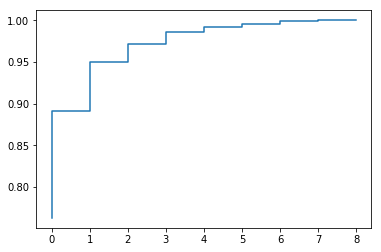

In [4]:
# PCA
pca=PCA()
X=pca.fit_transform(d_zero_rates_mat)
plt.step(range(9),np.cumsum(pca.explained_variance_ratio_),label='cumulative explained variance')
plt.show

In [5]:
pca.components_

array([[-0.05263108, -0.11978983, -0.22363717, -0.32850582, -0.37140926,
        -0.43323451, -0.43361916, -0.42033065, -0.36689276],
       [-0.41775059, -0.41454087, -0.43538379, -0.33192207, -0.23317363,
         0.04463154,  0.15423435,  0.27261888,  0.4465846 ],
       [-0.77245262, -0.20202636,  0.06633885,  0.31128661,  0.28970215,
         0.1135005 , -0.01345292, -0.15745368, -0.37338954],
       [ 0.35669218, -0.37024455, -0.3228897 , -0.12750047,  0.04792412,
         0.37958889,  0.32066185,  0.09006399, -0.59821028],
       [ 0.30893756, -0.6398652 , -0.06947313,  0.2948274 ,  0.41595458,
        -0.19407302, -0.29203936, -0.16380167,  0.28386594],
       [ 0.01132824, -0.47251306,  0.76250617, -0.10195986, -0.40475449,
         0.0438151 ,  0.13616366, -0.00115456, -0.0224447 ],
       [ 0.00487398,  0.00419499, -0.05524969,  0.05754269,  0.07325225,
        -0.53648622,  0.76043623, -0.34735499,  0.03863729],
       [-0.02035389, -0.04928767,  0.07940627,  0.00305964,  0

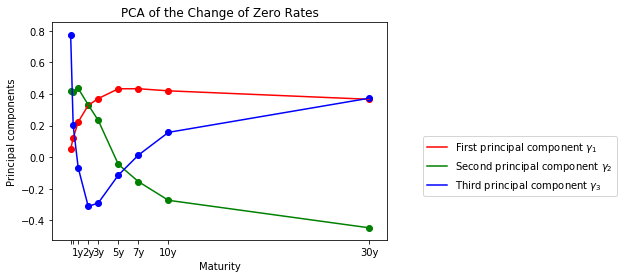

In [6]:
# Plot the PC
First_principal_component=-pca.components_[0]
Second_principal_component=-pca.components_[1]
Third_principal_component=-pca.components_[2]
plt.plot(t_vec,First_principal_component,'r-', label='First principal component $\gamma_1$')
plt.scatter(t_vec.tolist(),First_principal_component.tolist(),c="r")
plt.plot(t_vec,Second_principal_component,'g-',label='Second principal component $\gamma_2$')
plt.scatter(t_vec.tolist(),Second_principal_component.tolist(),c="g")
plt.plot(t_vec,Third_principal_component,'b-',label='Third principal component $\gamma_3$')
plt.scatter(t_vec.tolist(),Third_principal_component.tolist(),c="b")
plt.legend(bbox_to_anchor=(1.7, 0.5))
plt.xlabel('Maturity')
plt.ylabel('Principal components')
plt.title("PCA of the Change of Zero Rates")
plt.xticks((1/4,1/2,1,2,3, 5, 7, 10, 30),('','','1y','2y','3y','5y','7y','10y','30y'))
# plt.yticks( 0:0.005:0.05,('0','0.5%','1.0%','1.5%','2.0%','2.5%','3.0%','3.5%','4.0%','4.5%','5.0%'))
plt.show()

In [7]:
zero_rates_mat.iloc[0:4,:]

,S0023D 3M BLC2 Curncy,S0023D 6M BLC2 Curncy,S0023D 1Y BLC2 Curncy,S0023D 2Y BLC2 Curncy,S0023D 3Y BLC2 Curncy,S0023D 5Y BLC2 Curncy,S0023D 7Y BLC2 Curncy,S0023D 10Y BLC2 Curncy,S0023D 30Y BLC2 Curncy
Tickers,,,,,,,,,
2005-01-04,0.025626,0.028013,0.031466,0.035295,0.037502,0.041127,0.043987,0.047414,0.054355
2005-01-05,0.025815,0.028169,0.031785,0.035347,0.037545,0.040998,0.043990,0.047429,0.053764
2005-01-06,0.026258,0.028382,0.031433,0.035024,0.037321,0.040887,0.043820,0.047304,0.053891
2005-01-07,0.025968,0.028318,0.031691,0.035431,0.037712,0.041173,0.043951,0.047127,0.053727


In [8]:
zero_rates_mat.shift(1).iloc[0:4,:]

,S0023D 3M BLC2 Curncy,S0023D 6M BLC2 Curncy,S0023D 1Y BLC2 Curncy,S0023D 2Y BLC2 Curncy,S0023D 3Y BLC2 Curncy,S0023D 5Y BLC2 Curncy,S0023D 7Y BLC2 Curncy,S0023D 10Y BLC2 Curncy,S0023D 30Y BLC2 Curncy
Tickers,,,,,,,,,
2005-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,0.025626,0.028013,0.031466,0.035295,0.037502,0.041127,0.043987,0.047414,0.054355
2005-01-06,0.025815,0.028169,0.031785,0.035347,0.037545,0.040998,0.043990,0.047429,0.053764
2005-01-07,0.026258,0.028382,0.031433,0.035024,0.037321,0.040887,0.043820,0.047304,0.053891
